In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sdr

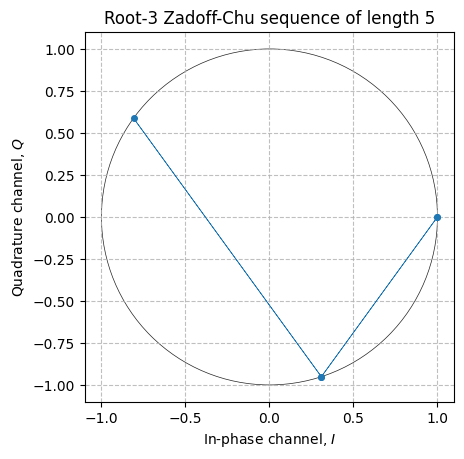

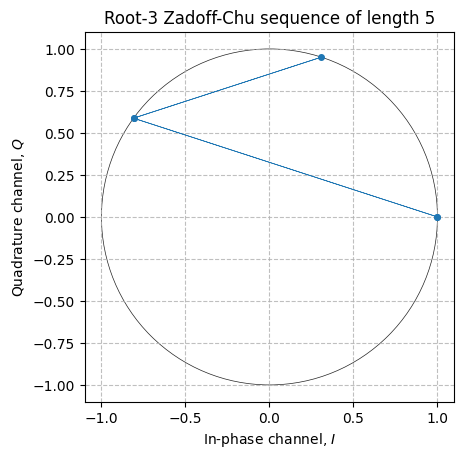

,ZC1 squence,ZC2 squence
0,1.0000+0.0000j,1.0000+0.0000j
1,0.3090-0.9511j,-0.8090+0.5878j
2,-0.8090+0.5878j,0.3090+0.9511j
3,0.3090-0.9511j,-0.8090+0.5878j
4,1.0000+0.0000j,1.0000+0.0000j


In [2]:
# Params: N - length, r1 - root index of ZC sequence
N = 5
r1 = 1
r2 = 3

ZC1 = sdr.zadoff_chu_sequence(N, r1)
ZC2 = sdr.zadoff_chu_sequence(N, r2)

plt.figure()
sdr.plot.constellation(ZC1, linestyle="-", linewidth=0.5, markersize=8)
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.title(f"Root-{r2} Zadoff-Chu sequence of length {N}")

plt.figure()
sdr.plot.constellation(ZC2, linestyle="-", linewidth=0.5, markersize=8)
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.title(f"Root-{r2} Zadoff-Chu sequence of length {N}")

# Print sequences
plt.show()

# Print sequences3
pd.DataFrame({
    'ZC1 squence':  np.round(ZC1, decimals=4),
    'ZC2 squence':  np.round(ZC2, decimals=4)
})

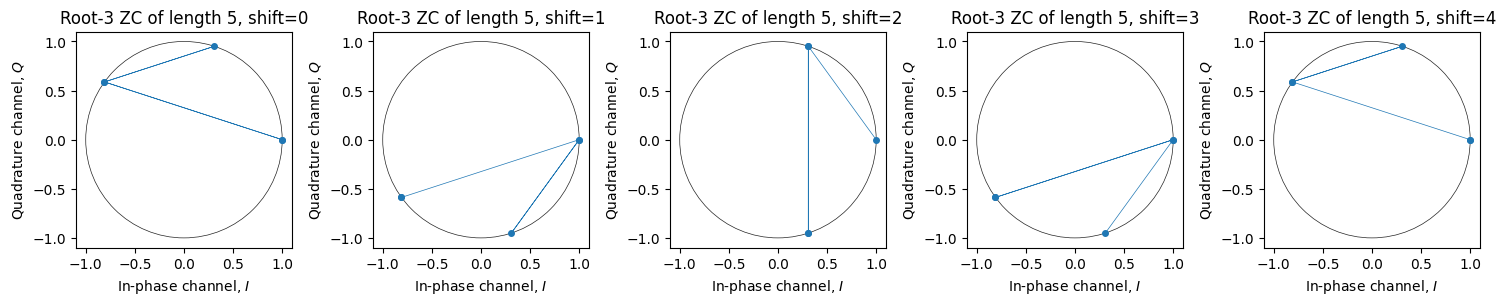

,shift=0,shift=1,shift=2,shift=3,shift=4
0,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j,1.0000+0.0000j
1,-0.8090+0.5878j,0.3090-0.9511j,0.3090+0.9511j,-0.8090-0.5878j,1.0000+0.0000j
2,0.3090+0.9511j,1.0000+0.0000j,0.3090-0.9511j,-0.8090-0.5878j,-0.8090+0.5878j
3,-0.8090+0.5878j,-0.8090-0.5878j,0.3090-0.9511j,1.0000-0.0000j,0.3090+0.9511j
4,1.0000+0.0000j,-0.8090-0.5878j,0.3090+0.9511j,0.3090-0.9511j,-0.8090+0.5878j


In [3]:
# Cyclic shift of ZC sequence
# Params: N - length, r - root index of ZC sequence
N = 5
r = 3
num_columns = 5

dataframes = {}
plt.figure(figsize=(15, 10))  # Создать фигуру для графиков
num_plots = N

for i in range(N):
    ZC = sdr.zadoff_chu_sequence(N, r, shift=i)
    dataframes[f'shift={i}'] = np.round(ZC, decimals=4)
    
    # Создать подграфик
    plt.subplot(N // num_columns + (N % num_columns > 0), num_columns, i+1)
    sdr.plot.constellation(ZC, linestyle="-", linewidth=0.5, markersize=8)
    circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
    plt.gca().add_artist(circle)
    plt.title(f"Root-{r} ZC of length {N}, shift={i}")

# Увеличить размер подграфиков
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Показать графики
plt.tight_layout()
plt.show()

# Вывести DataFrame
pd.DataFrame(dataframes)


Text(0.5, 1.0, 'Periodic autocorrelation of root-3 Zadoff-Chu sequence of length 5')

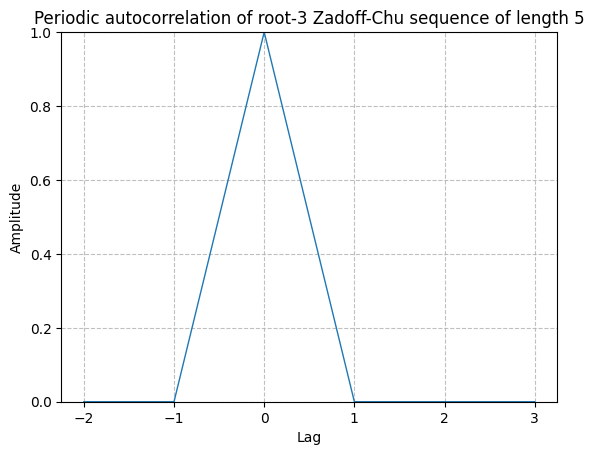

In [4]:
# Params: N - length, r1 - root index of ZC sequence
N = 5
r1 = 3

ZC2 = sdr.zadoff_chu_sequence(N, r1)

# Perform periodic auto correlation
corr = np.correlate(np.roll(np.tile(ZC1, 2), -N//2), ZC1, mode="valid")
lag = np.arange(-N//2 + 1, N//2 + 2)

plt.figure()
sdr.plot.time_domain(lag, np.abs(corr) / N)
plt.ylim(0, 1)
plt.xlabel("Lag")
plt.title(f'Periodic autocorrelation of root-{r1} Zadoff-Chu sequence of length {N}')

Text(0.5, 1.0, 'Periodic cross correlation of root-3 and root-5 Zadoff-Chu sequences of length 5')

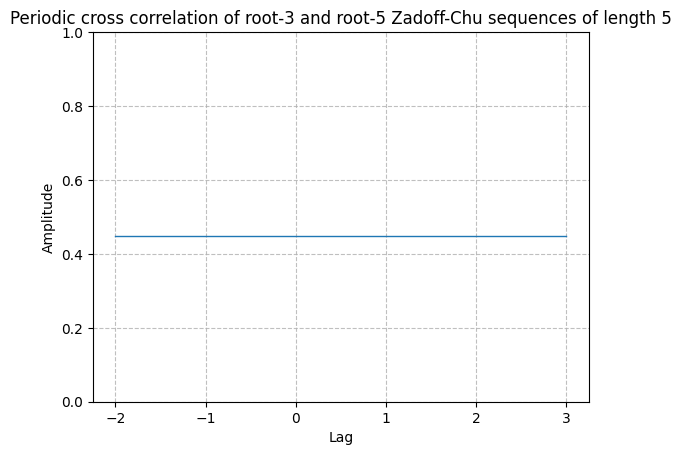

In [5]:
# Cross correlation of ZC1 with ZC2
# Params: N - length, r1 - root index of ZC sequence
N = 5
r1 = 1
r2 = 3

ZC1 = sdr.zadoff_chu_sequence(N, r1)
ZC2 = sdr.zadoff_chu_sequence(N, r2)

xcorr = np.correlate(np.roll(np.tile(ZC1, 2), -N//2), ZC2, mode="valid")
lag = np.arange(-N//2 + 1, N//2 + 2)

plt.figure()
sdr.plot.time_domain(lag, np.abs(xcorr) / N)
plt.ylim(0, 1)
plt.xlabel("Lag")
plt.title(f"Periodic cross correlation of root-3 and root-5 Zadoff-Chu sequences of length {N}")

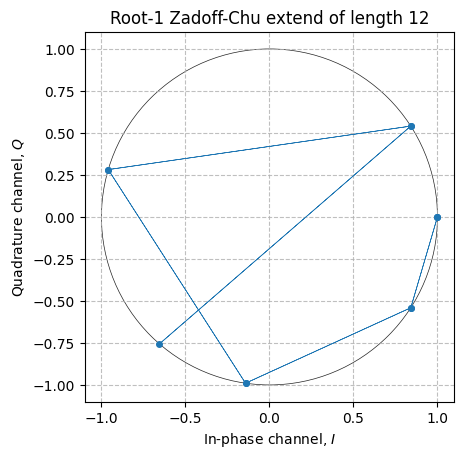

In [6]:
# Generate Cyclyc extend of ZC
# Params: N - length, r1 - root index of ZC sequence
N = 11
N_sf = 12
r1 = 1

ZC1 = sdr.zadoff_chu_sequence(N, r1)
S1 = np.zeros(N_sf)
# Generate S1 - Extend of ZC sequence
S1 = ZC1[np.arange(N_sf) % N]

plt.figure()
sdr.plot.constellation(S1, linestyle="-", linewidth=0.5, markersize=8)
circle = plt.Circle((0, 0), 1, color='#222222', linewidth=0.5, fill=False)
plt.gca().add_artist(circle)
plt.title(f"Root-{r1} Zadoff-Chu extend of length {N_sf}")
plt.show()

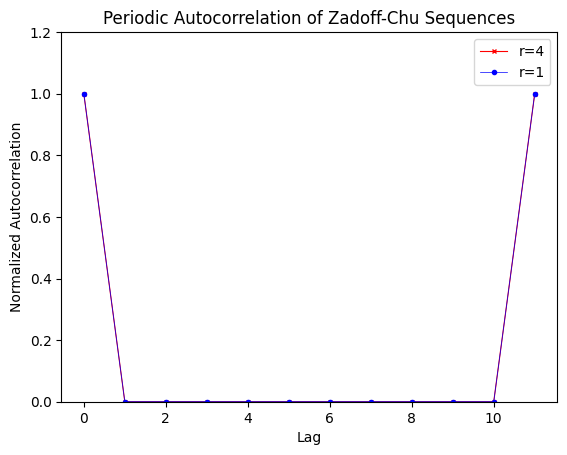

In [7]:
# Autocorrelation for Cyclyc extend of ZC
# Params: N - length, r1 - root index of ZC sequence
N = 11
N_sf = 12
r1 = 1
r2 = 4

ZC1 = sdr.zadoff_chu_sequence(N, r1)
ZC2 = sdr.zadoff_chu_sequence(N, r2)
S1 = np.zeros(N_sf)
S2 = np.zeros(N_sf)
# Generate S1 - Extend of ZC sequence
S1 = ZC1[np.arange(N_sf) % N]
S2 = ZC2[np.arange(N_sf) % N]
# S1 = sdr.zadoff_chu_sequence(N, r1)
# S2 = sdr.zadoff_chu_sequence(N, r2)
L = N_sf

# Perform periodic auto correlation
lag = np.arange(L+1)
corr1 = np.correlate(np.roll(np.tile(S1, 2), 0), S1)
corr2 = np.correlate(np.roll(np.tile(S2, 2), 0), S2)

plt.figure()
plt.plot(lag, np.abs(corr2) / L, label=f'r={r2}', color='r', linewidth=0.8, marker='x', markersize=3)
plt.plot(lag, np.abs(corr1) / L, label=f'r={r1}', color='b', linewidth=0.5, marker='o', markersize=3)
plt.ylim(0, 1.2)
plt.xlabel("Lag")
plt.ylabel("Normalized Autocorrelation")
plt.title("Periodic Autocorrelation of Zadoff-Chu Sequences")
plt.legend(loc='upper right')
plt.show()

In [8]:
# Autocorrelation for Cyclyc extend of ZC
# Params: N - length, r1 - root index of ZC sequence
N = 11
N_sf = 12
r1 = 1
r2 = 4

ZC1 = sdr.zadoff_chu_sequence(N, r1)
ZC2 = sdr.zadoff_chu_sequence(N, r2)
S1 = np.zeros(N_sf)
S2 = np.zeros(N_sf)
# Generate S1 - Extend of ZC sequence
S1 = ZC1[np.arange(N_sf) % N]
S2 = ZC2[np.arange(N_sf) % N]

print(*np.roll(S1, 0), sep='\n')

(1+0j)
(0.8412535328311812-0.5406408174555976j)
(-0.14231483827328523-0.9898214418809327j)
(-0.9594929736144974+0.28173255684142984j)
(0.8412535328311812+0.5406408174555974j)
(-0.6548607339452839-0.7557495743542594j)
(0.8412535328311811+0.5406408174555977j)
(-0.9594929736144976+0.28173255684142895j)
(-0.1423148382732834-0.989821441880933j)
(0.8412535328311819-0.5406408174555964j)
(1-2.328066879653148e-15j)
(1+0j)
